# Looking for trends over time in pipeline incidents

In [1]:
import pandas as pd
import numpy as np
import os

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#NOTE: df = gas distribution
df = pd.read_csv('../data/processed/gd2010toPresent_significant.csv')

### Areas we are interested in and their corresponding columns: 
* estimated total cost of incident: "total_cost"
    * adjusted for previous calendar year inflation rate: "TOTAL_COST_CURRENT"
* injuries
    * were there injuries? Y/N: "INJURY_IND"
    * total injuries: "injure"
    * number of general public evacuated: "NUM_PUB_EVACUATED"
* deaths 
    * were there fatalities? Y/N: "FATALITY_IND"
    * total deaths: "fatal"
* cause of incident: "cause" or "cause_details"
    * "narrative"
* estimated volume of gas released unintentionally: "unintentional_release" 
* year of item installation: "installation_year"


## Cost

In [3]:
# Sum of total costs in the last 12 years
df.total_cost.sum()

2112339872

In [4]:
# Sum of total costs in that time when adjusting for inflation
df.total_cost_current.sum()

2257199320.738454

In [5]:
# Most expensive incident
df.total_cost_current.sort_values(ascending=False)
df.groupby(by='report_number').total_cost_current.max().sort_values(ascending=False)

report_number
20180092    1.684597e+09
20170111    5.209804e+07
20190049    3.646607e+07
20130031    2.268757e+07
20180073    2.177038e+07
                ...     
20160043    0.000000e+00
20110368    0.000000e+00
20170024    0.000000e+00
20130097    0.000000e+00
20110152    0.000000e+00
Name: total_cost_current, Length: 780, dtype: float64

In [6]:
df[df['report_number'] == 20180092].cause_details
# Columbia Gas of Massachusetts
# 1 person died
# 25 injured
# cause: incorrect operation --> pipeline or equipment overpressured

535    PIPELINE OR EQUIPMENT OVERPRESSURED
Name: cause_details, dtype: object

## Comparing average cost of each type of incident
I'm wondering if a certain type of pipeline yields a greater cost. Here, I'll compare mean/median of each type of pipeline incident to see if one stands out. 

In [7]:
# Reading in other data

#df2 = gas transmission and gathering
df2 = pd.read_csv('../data/processed/gtggungs2010toPresent_significant.csv')

#df3 = liquid natural gas
df3 = pd.read_csv('../data/processed/hl2010toPresent_significant.csv')

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18,19,51,57,58,59,61,64,66,67,68,71,72,73,74,75,76,77,78,79,80,81,82,83,100,101,118,125,135,150,166,170,202,203,204,241,242,243,244,256,285,345,359,360,370,386,387,388,410,411,456,459,460,461,468,492,493,528,529,531,534,535,537,560,561,563,565,566,568,591,592,614,615,616,628,654,664,665,666) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
# Gas distribution
df['total_cost_current'].describe()
# df['total_cost_current'].median()
# df['total_cost_current']
# df.total_cost_current.hist(bins=20)
#df['total_cost_current'].hist()



count    7.800000e+02
mean     2.893845e+06
std      6.036700e+07
min      0.000000e+00
25%      1.059325e+05
50%      2.020946e+05
75%      4.418319e+05
max      1.684597e+09
Name: total_cost_current, dtype: float64

<AxesSubplot:>

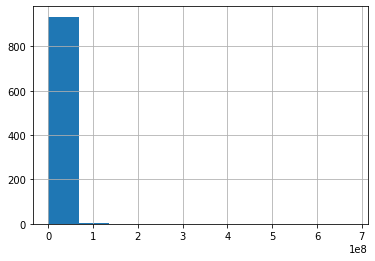

In [9]:
# Gas transmission and gathering
df2['total_cost_current'].describe()
#df2['total_cost_current'].median()
df2['total_cost_current'].hist()


<AxesSubplot:>

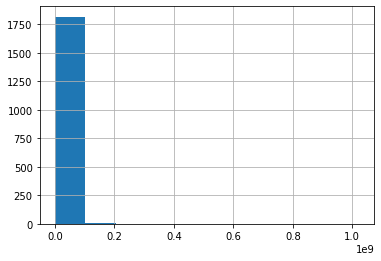

In [18]:
# Hazardous Liquid 
df3['total_cost_current'].describe()
#df3['total_cost_current'].median()
df3['total_cost_current'].hist()


## Looking at cost comparisons by cause

In [19]:
# Here we are reading in our csv that has all of the 3 types of incidents in one
df4 = pd.read_csv('../data/processed/pipeline_incidents_2010_to_present.csv')

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,15,16,18,19,20,21,22,25,26,27,28,30,31,32,33,36,56,57,58,63,64,65,72,73,75,76,77,78,87,89,92,93,94,95,101,102,103,104,105,106,108,109,120,148,149,151,152,154,171,172,173,174,193,194,197,198,205,214,217,218,219,225,233,234,238,239,240,251,252,256,257,265,266,268,269,276,277,278,279,280,281,290,293,294,295,296,297,300,301,303,304,305,306,307,310,311,313,314,315,316,317,318,319,320,321,322,324,325,326,327,329,330,331,332,333,334,335,336,341,342,343,344,345,347,348,351,354,355,357,359,363,366,367,368,369,371,372,373,374,375,376,377,378,379,380,385,386,387,393,400,401,407,421,422,423,427,428,429,430,432,434,435,436,439,440,441,443,446,447,449,451,452,454,455,456,457,460,462,463,464,465,466,472,473,474,480,482,488,489,490,491,492,493,503,510,512,516,517,518,522,526,529,530,532,533,535,537,539,540,543,545,546,547,548,549,550,552,557,558,559,561,562,566,567,5

In [20]:
# Here are our causes
df4['cause'].value_counts()

EQUIPMENT FAILURE                   807
CORROSION FAILURE                   730
EXCAVATION DAMAGE                   506
MATERIAL FAILURE OF PIPE OR WELD    417
INCORRECT OPERATION                 359
OTHER OUTSIDE FORCE DAMAGE          326
NATURAL FORCE DAMAGE                232
OTHER INCIDENT CAUSE                160
Name: cause, dtype: int64

In [21]:
df4.groupby(by='cause').total_cost_current.mean()
mean_cost = df4.groupby(by='cause').total_cost_current.mean().to_frame()
mean_cost

,total_cost_current
cause,
CORROSION FAILURE,1.220531e+06
EQUIPMENT FAILURE,4.891568e+05
EXCAVATION DAMAGE,1.063643e+06
INCORRECT OPERATION,5.659143e+06
MATERIAL FAILURE OF PIPE OR WELD,5.763919e+06
NATURAL FORCE DAMAGE,2.607557e+06
OTHER INCIDENT CAUSE,1.580400e+06
OTHER OUTSIDE FORCE DAMAGE,1.215923e+06


<AxesSubplot:ylabel='cause'>

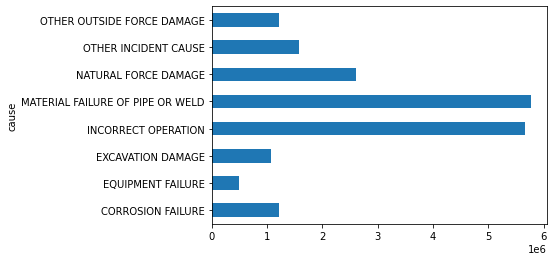

In [22]:
mean_cost['total_cost_current'].plot(kind='barh')

In [23]:
med_cost = df4.groupby(by='cause').total_cost_current.median().to_frame()
med_cost

,total_cost_current
cause,
CORROSION FAILURE,312025.93810
EQUIPMENT FAILURE,145571.77150
EXCAVATION DAMAGE,238756.33845
INCORRECT OPERATION,122079.23560
MATERIAL FAILURE OF PIPE OR WELD,332218.42230
NATURAL FORCE DAMAGE,304208.32730
OTHER INCIDENT CAUSE,284734.09570
OTHER OUTSIDE FORCE DAMAGE,233220.60065


<AxesSubplot:ylabel='cause'>

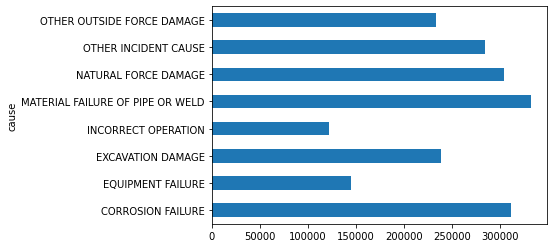

In [24]:
med_cost['total_cost_current'].plot(kind='barh')

In [25]:
df4[df4['cause'] == 'EQUIPMENT FAILURE'].total_cost_current.describe()

count    8.070000e+02
mean     4.891568e+05
std      2.229337e+06
min      0.000000e+00
25%      4.377090e+04
50%      1.455718e+05
75%      3.332623e+05
max      4.263877e+07
Name: total_cost_current, dtype: float64

In [26]:
df4[df4['cause'] == 'CORROSION FAILURE'].total_cost_current.describe()

count    7.300000e+02
mean     1.220531e+06
std      6.880339e+06
min      0.000000e+00
25%      1.660594e+05
50%      3.120259e+05
75%      6.839286e+05
max      1.593241e+08
Name: total_cost_current, dtype: float64

In [27]:
# Double checking every single row has a cause, and they do!
df4.cause.value_counts()

EQUIPMENT FAILURE                   807
CORROSION FAILURE                   730
EXCAVATION DAMAGE                   506
MATERIAL FAILURE OF PIPE OR WELD    417
INCORRECT OPERATION                 359
OTHER OUTSIDE FORCE DAMAGE          326
NATURAL FORCE DAMAGE                232
OTHER INCIDENT CAUSE                160
Name: cause, dtype: int64

In [28]:
df4[df4['cause'] == 'MATERIAL FAILURE OF PIPE OR WELD'].total_cost_current.describe()

count    4.170000e+02
mean     5.763919e+06
std      6.039462e+07
min      0.000000e+00
25%      1.708046e+05
50%      3.322184e+05
75%      7.552175e+05
max      1.023097e+09
Name: total_cost_current, dtype: float64

In [29]:
#most expensive incident of all of the dataset 
df4['total_cost_current'].sort_values(ascending=False)
# Five most expensive incidents and their index number: 
    # 535     1.684597e+09
    # 1783    1.023097e+09
    # 832     6.794712e+08
    # 1903    1.611086e+08
    # 2498    1.593241e+08

535     1.684597e+09
1783    1.023097e+09
832     6.794712e+08
1903    1.611086e+08
2498    1.593241e+08
            ...     
795     0.000000e+00
200     0.000000e+00
2209    0.000000e+00
1702    0.000000e+00
2340    0.000000e+00
Name: total_cost_current, Length: 3537, dtype: float64

In [30]:
df4[df4['cause'] == 'MATERIAL FAILURE OF PIPE OR WELD'].cause_details.value_counts()

CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                                  119
ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD OR OTHER WELDS FORMED IN THE FIELD)    100
DESIGN-, CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                          79
ENVIRONMENTAL CRACKING-RELATED                                                         52
MECHANICAL JOINT FAILURE                                                               20
BODY OF PIPE                                                                           17
FUSION JOINT                                                                           16
OTHER PIPE, WELD, OR JOINT FAILURE                                                     11
BUTT WELD                                                                               3
Name: cause_details, dtype: int64

In [31]:
df4[df4['cause'] == 'NATURAL FORCE DAMAGE'].cause_details.value_counts()

HEAVY RAINS/FLOODS                               57
TEMPERATURE                                      54
LIGHTNING                                        44
EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS    38
OTHER NATURAL FORCE DAMAGE                       30
HIGH WINDS                                        8
SNOW/ICE IMPACT OR ACCUMULATION                   1
Name: cause_details, dtype: int64

In [32]:
env = df4[df4['cause'] == 'NATURAL FORCE DAMAGE']

In [33]:
med_cost2 = env.groupby(by='cause_details').total_cost_current.median().to_frame()
med_cost2

,total_cost_current
cause_details,
"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",7.374482e+05
HEAVY RAINS/FLOODS,1.141484e+06
HIGH WINDS,1.725798e+05
LIGHTNING,1.567736e+05
OTHER NATURAL FORCE DAMAGE,3.487548e+05
SNOW/ICE IMPACT OR ACCUMULATION,5.124214e+05
TEMPERATURE,2.054556e+05


<AxesSubplot:ylabel='cause_details'>

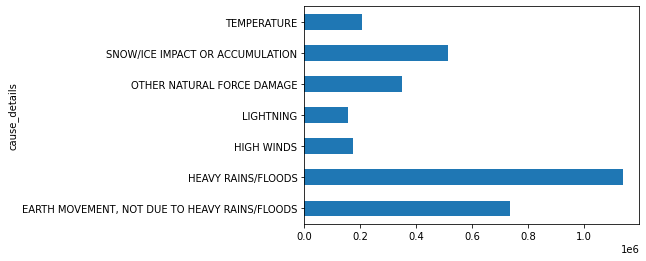

In [34]:
med_cost2['total_cost_current'].plot(kind='barh')

In [35]:
med_cost3 = df4.groupby(by='cause_details').total_cost_current.median().to_frame()
med_cost3

,total_cost_current
cause_details,
BODY OF PIPE,3.451391e+05
BUTT WELD,5.283555e+05
COMPRESSOR OR COMPRESSOR-RELATED EQUIPMENT,2.193639e+05
"CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED",2.728493e+05
"DAMAGE BY BOATS, BARGES, DRILLING RIGS, OR OTHER MARITIME EQUIPMENT OR VESSELS SET ADRIFT OR WHICH HAVE OTHERWISE LOST THEIR MOORING",5.232231e+05
"DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHICLE/EQUIPMENT NOT ENGAGED IN EXCAVATION",1.515764e+05
DAMAGE BY OPERATOR OR OPERATOR'S CONTRACTOR NOT RELATED TO EXCAVATION AND NOT DUE TO MOTORIZED VEHICLE/EQUIPMENT DAMAGE,1.872913e+05
DEFECTIVE OR LOOSE TUBING OR FITTING,8.756600e+04
"DESIGN-, CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED",2.802316e+05


In [36]:
med_cost3.sort_values('total_cost_current')

,total_cost_current
cause_details,
OTHER INCORRECT OPERATION,5.692947e+04
PUMP OR PUMP-RELATED EQUIPMENT,7.675071e+04
WRONG EQUIPMENT SPECIFIED OR INSTALLED,8.345632e+04
DEFECTIVE OR LOOSE TUBING OR FITTING,8.756600e+04
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT,9.343326e+04
"VALVE LEFT OR PLACED IN WRONG POSITION, BUT NOT RESULTING IN AN OVERPRESSURE",1.058130e+05
"VALVE LEFT OR PLACED IN WRONG POSITION, BUT NOT RESULTING IN A TANK, VESSEL, OR SUMP/SEPARATOR OVERFLOW OR FACILITY OVERPRESSURE",1.150039e+05
"TANK, VESSEL, OR SUMP/SEPARATOR ALLOWED OR CAUSED TO OVERFILL OR OVERFLOW",1.220792e+05
THREADED CONNECTION/COUPLING FAILURE,1.489809e+05


In [37]:
df4[df4.cause_details == 'ENVIRONMENTAL CRACKING-RELATED'].total_cost_current.median()

934124.8621

In [122]:
df4[df4.cause_details == 'ENVIRONMENTAL CRACKING-RELATED'].cause.value_counts()

MATERIAL FAILURE OF PIPE OR WELD    52
Name: cause, dtype: int64

In [123]:
df4.columns

Index(['datafile_as_of', 'ff', 'significant', 'serious', 'report_number',
       'supplemental_number', 'report_received_date', 'report_type',
       'operator_id', 'name',
       ...
       'root_cause_type_other', 'failure_type', 'pwf_addl_misalignment_ind',
       'failure_details', 'ief_addl_misalignment_ind',
       'additional_thermal_ind', 'spill_type_category',
       'eqf_pump_equipment_ind', 'io_tank_vessel_ind', 'prepared_date'],
      dtype='object', length=826)

# Looking at Age of Pipeline

<AxesSubplot:title={'center':'Number of pipelines installed each year'}>

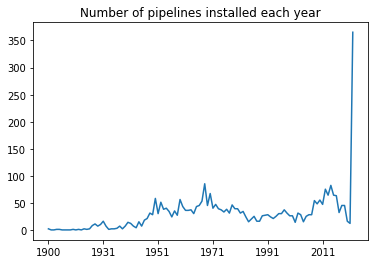

In [43]:
df4.installation_year.value_counts().sort_index().plot(title='Number of pipelines installed each year')

# Looking at 'material invovled' in incident
* Carbon Steel is far and above the most common 'material invovled' for significant pipeline incidents (nearly 70%) 

In [46]:
df4.material_involved.value_counts()

CARBON STEEL                                   2437
STEEL                                           387
MATERIAL OTHER THAN CARBON STEEL                266
PLASTIC                                         250
OTHER                                            79
MATERIAL OTHER THAN CARBON STEEL OR PLASTIC      44
CAST/WROUGHT IRON                                40
UNKNOWN                                          18
COPPER                                            6
DUCTILE IRON                                      1
Name: material_involved, dtype: int64

In [47]:
df4.material_involved.value_counts(normalize=True)

CARBON STEEL                                   0.690760
STEEL                                          0.109694
MATERIAL OTHER THAN CARBON STEEL               0.075397
PLASTIC                                        0.070862
OTHER                                          0.022392
MATERIAL OTHER THAN CARBON STEEL OR PLASTIC    0.012472
CAST/WROUGHT IRON                              0.011338
UNKNOWN                                        0.005102
COPPER                                         0.001701
DUCTILE IRON                                   0.000283
Name: material_involved, dtype: float64

## Regression Attempts

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols("Sales ~ TV + Radio", data=advertising)
results = model.fit()
results.summary()